In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from ex_01_read_data import get_welding_data
from ex_03_feature_extraction import extract_features

In [2]:
data_path = Path("data/Welding/data.csv")
plot_path = Path("plots/ex_03")
plot_path.mkdir(parents=True, exist_ok=True)

## Exercise 3.3: Feature Exploration with Pairplots

In this exercise, you will create a seaborn pairplot to visualize relationships between the features extracted from the welding data. 

In [3]:
n_samples = 1_000
data, labels, _ = get_welding_data(data_path, n_samples=n_samples)
features = extract_features(data, labels)
features.head()

,current_mean,current_std,current_median,current_rms,current_min,current_max,current_iqr,current_dom_freq,voltage_mean,voltage_std,...,voltage_rms,voltage_min,voltage_max,voltage_iqr,voltage_dom_freq,power_mean,power_std,power_rms,power_max,label
0,210.764508,170.804705,154.990549,271.285689,28.958123,519.950029,282.963459,0.010,10.574654,8.268844,...,13.423751,1.049995,27.850932,12.779637,0.005,2382.225159,3803.159227,4487.651592,14418.636317,1
1,171.806151,179.416479,80.310740,248.410198,30.975586,539.106750,224.566353,0.005,24.133686,4.402413,...,24.531939,19.615398,32.545301,7.083529,0.005,4922.424894,5856.679217,7650.552809,17500.560000,0
2,194.029498,185.505249,70.669948,268.439273,54.779192,535.622450,282.287269,0.005,21.100571,5.394211,...,21.779155,3.886930,29.409783,7.389113,0.030,4818.889221,5538.979543,7341.797307,15751.470461,1
3,126.567052,160.461801,28.632093,204.370272,23.364217,524.157899,121.779143,0.005,20.081315,4.954985,...,20.683595,4.735265,33.145948,4.203499,0.005,3118.725273,4647.434487,5596.882583,15335.499516,1
4,135.535761,161.675387,35.582150,210.971262,26.006490,512.138755,138.606379,0.005,21.993059,3.649966,...,22.293876,18.631134,30.251122,5.039484,0.005,3559.617349,4812.422003,5985.840059,15481.804126,0


Loading 1000 samples for feature analysis...
Data loaded successfully: 1000 samples.
Extracting features...
Features extracted. DataFrame shape: (1000, 21)
Displaying head of features DataFrame:
   current_mean  current_std  current_median  current_rms  current_min  \
0    210.764508   170.804705      154.990549   271.285689    28.958123   
1    171.806151   179.416479       80.310740   248.410198    30.975586   
2    194.029498   185.505249       70.669948   268.439273    54.779192   
3    126.567052   160.461801       28.632093   204.370272    23.364217   
4    135.535761   161.675387       35.582150   210.971262    26.006490   

   current_max  current_iqr  current_dom_freq  voltage_mean  voltage_std  ...  \
0   519.950029   282.963459             0.010     10.574654     8.268844  ...   
1   539.106750   224.566353             0.005     24.133686     4.402413  ...   
2   535.622450   282.287269             0.005     21.100571     5.394211  ...   
3   524.157899   121.779143         

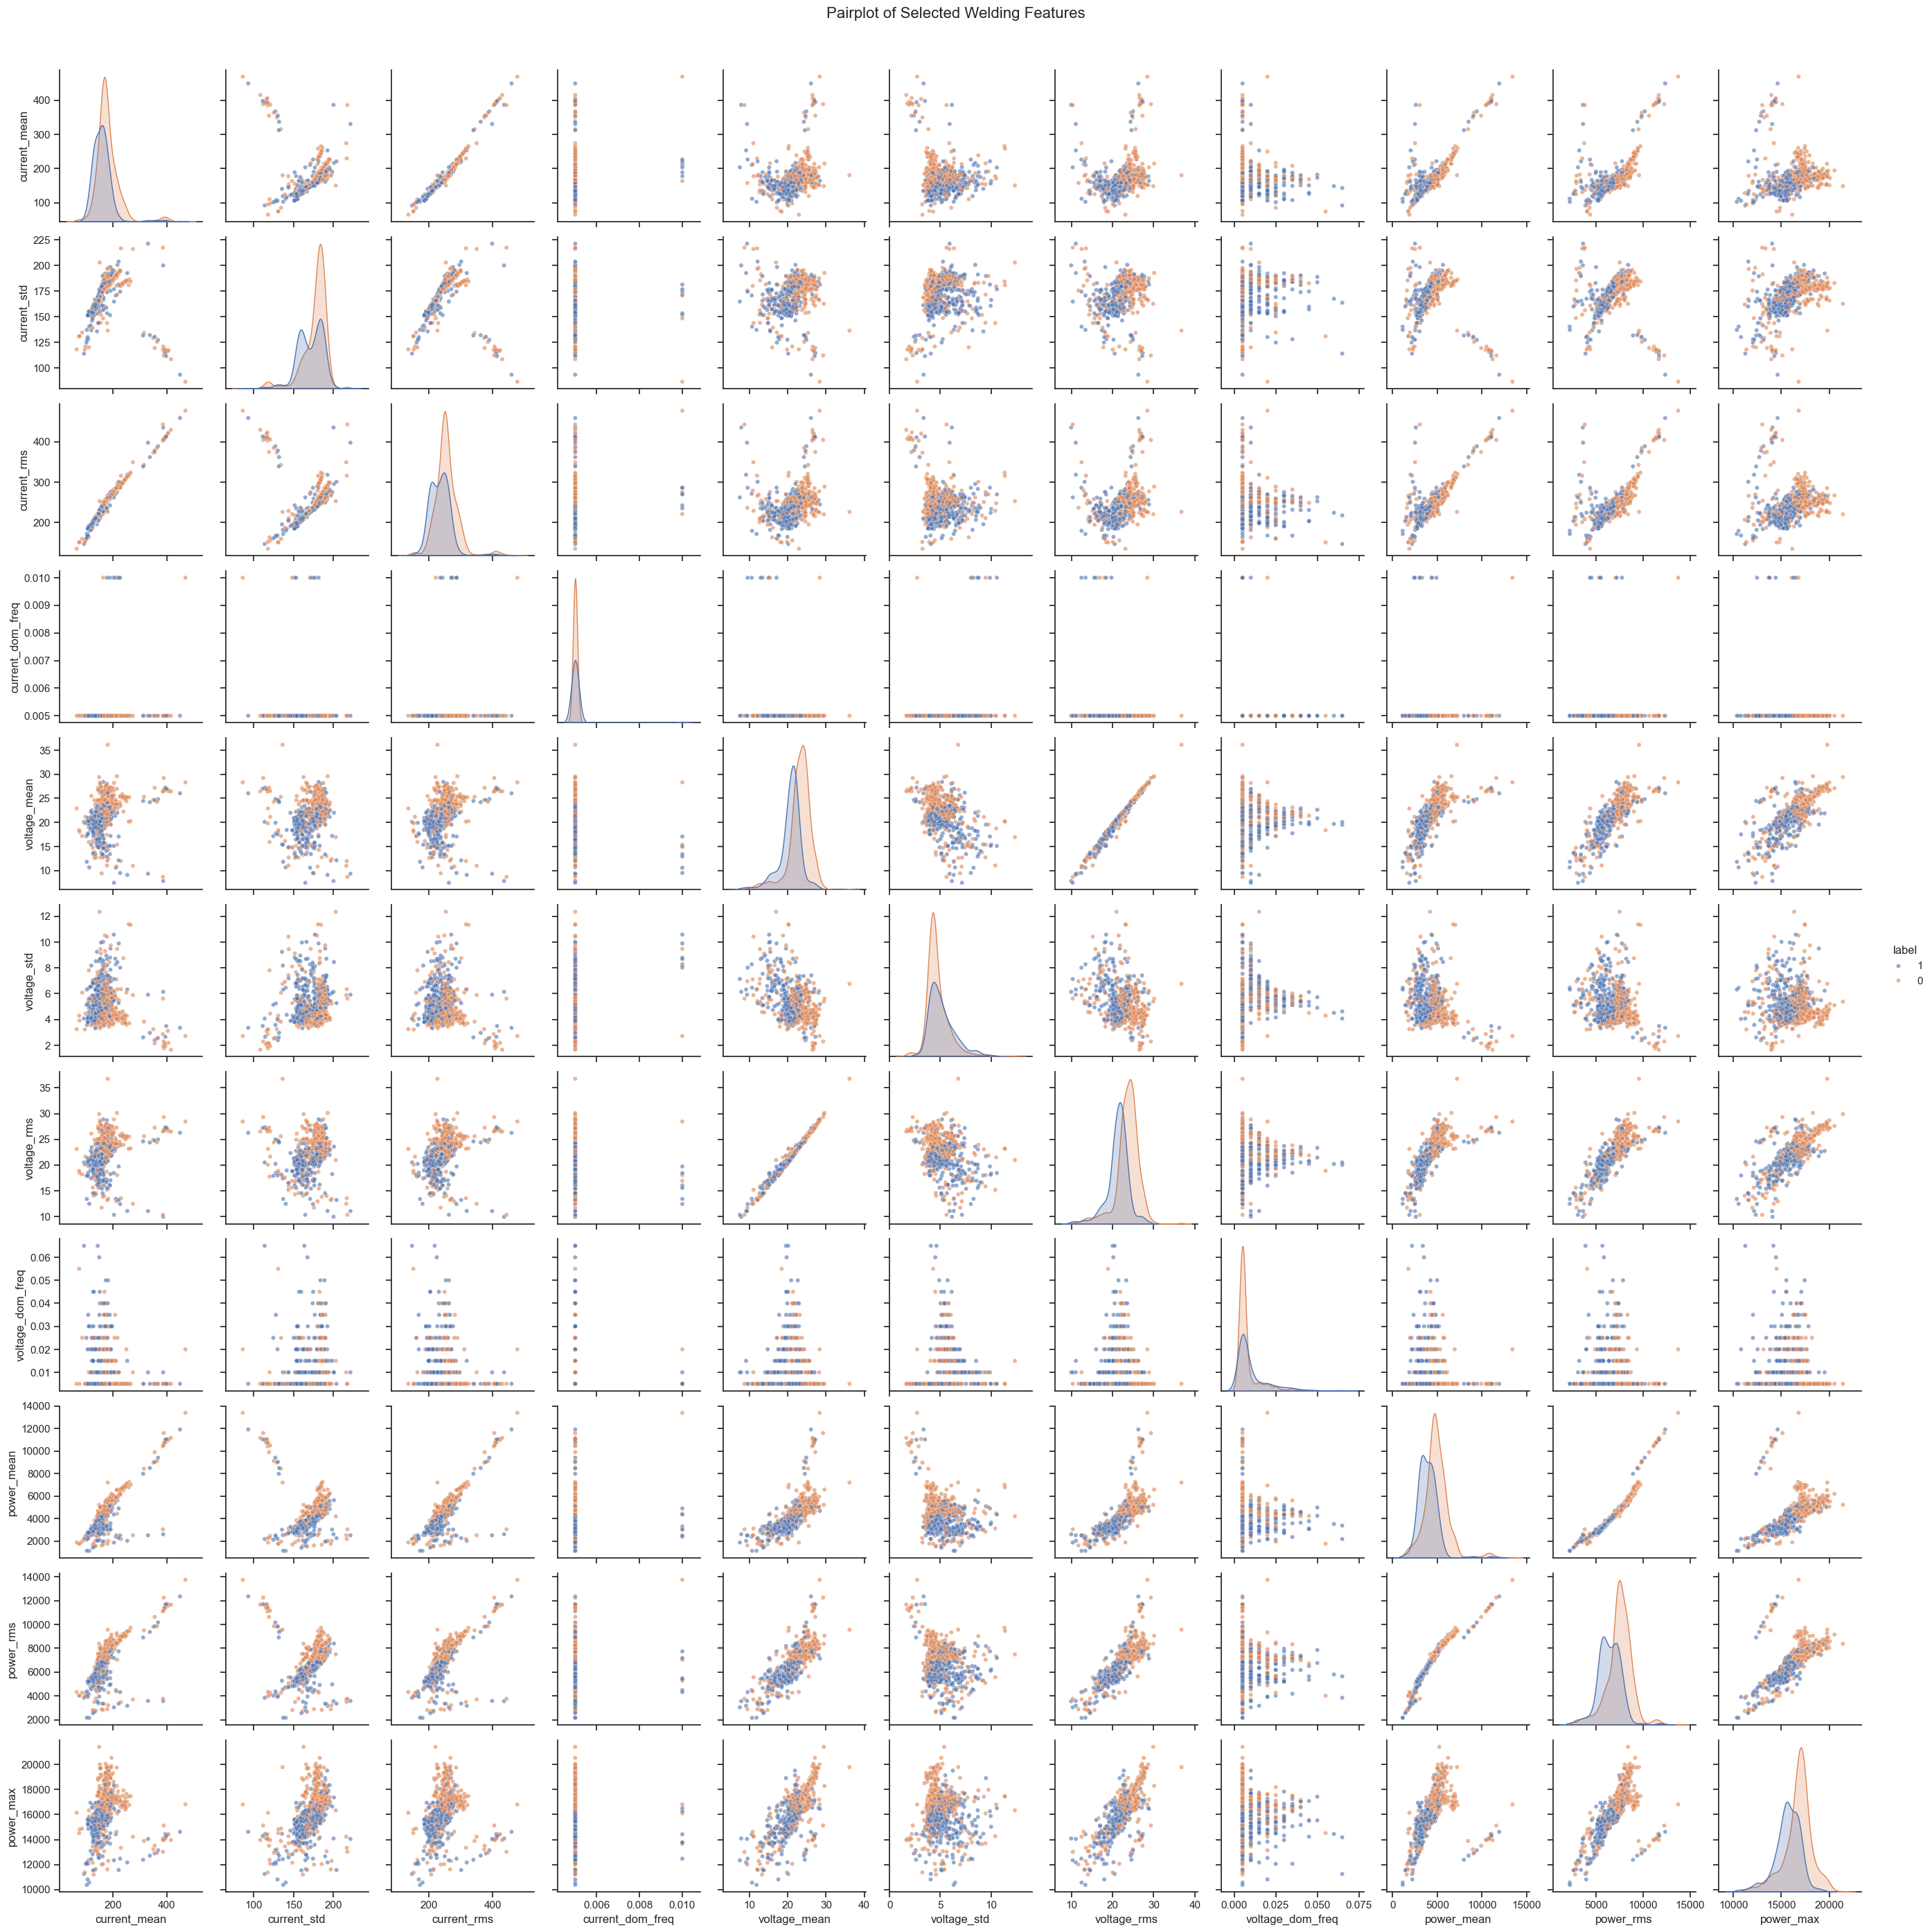

In [4]:
print(f"Loading {n_samples} samples for feature analysis...")
try:
    if data.size == 0:
        print(f"No data loaded")
    else:
        print(f"Data loaded successfully: {data.shape[0]} samples.")
        
        print("Extracting features...")
        features_df = extract_features(data, labels) 
        
        print(f"Features extracted. DataFrame shape: {features_df.shape}")

        # Add labels to the features DataFrame for coloring the pairplot
        # Ensure labels are 1D array for pd.Series
        if labels.ndim > 1:
            plot_labels = labels[:, 0] if labels.shape[0] > 0 and labels.shape[1] > 0 else np.zeros(labels.shape[0])
        else:
            plot_labels = labels

        # Ensure plot_labels has the same length as features_df index
        if len(plot_labels) == len(features_df):
            features_df['label'] = pd.Series(plot_labels, index=features_df.index).astype(str) # Convert labels to string 
            
        else:
            print(f"Warning: Length mismatch between features and labels")

        print("Displaying head of features DataFrame:")
        print(features_df.head())

        selected_feature_names = [
            'current_mean', 'current_std', 'current_rms', 'current_dom_freq',
            'voltage_mean', 'voltage_std', 'voltage_rms', 'voltage_dom_freq',
            'power_mean', 'power_rms', 'power_max','label'
        ]
        

        pairplot_df_subset = features_df[selected_feature_names]
        
        pairplot_df_cleaned = pairplot_df_subset.dropna()
        
        if not pairplot_df_cleaned.empty: 
            sns.set_theme(style="ticks")
            print(f"Generating pairplot for {len(selected_feature_names)} features .")
            
            pair_plot_fig = sns.pairplot(
                pairplot_df_cleaned, 
                hue='label',
                plot_kws={'alpha': 0.6, 's': 20}, 
            )
            
            pair_plot_fig.fig.suptitle("Pairplot of Selected Welding Features", y=1.02, fontsize=16)
            
            pairplot_save_path = plot_path / "welding_selected_features_pairplot.png"
            pair_plot_fig.savefig(pairplot_save_path, dpi=150) # Save with decent resolution
            print(f"Pairplot saved to {pairplot_save_path}")
            
            plt.show() # Display the plot
        elif pairplot_df_cleaned.empty:
            print("DataFrame subset is empty after cleaning NaNs.")
        

except Exception as e:
    print(f"error occurred during Exercise 3.3: {e}")




## Exercise 3.4: Describe Your Feature Selection

Based on the pairplot visualization from Exercise 3.1, provide a detailed analysis of your feature selection:

1. Which features appear most effective at separating the quality classes?
2. Are there features that show strong correlation with each other? Would it make sense to remove any redundant features?
3. Explain the physical significance of your selected features in the context of welding quality.
4. If you were to select a subset of 5 most important features for classifying welding quality, which would you choose and why?
5. Discuss any patterns or insights you discovered in the data visualization that might help with building a classification model.


1. in voltage_mean and voltage_rms the seperation is noticeable; power_mean / power_rms might also be effective

2. currrent_mean and current_rms are very correlated. Their scatter plot forms a tight/linear plot; \
similiraly voltage_mean and voltage_rms \
and power_mean and power_rms ; \
we could remove one of them : keeping nly current_mean and removing current_rms

3. Statistical features (like mean, std, rms, min, max for current, voltage, and power) : reflect the overall operational levels, stability, and extreme values of the welding process. Deviations or instability often correlate with weld defects. \
Frequency features (*_dom_freq) indicate dominant periodic behaviors or oscillations in the signals. Changes here can point to power source issues . \
Power-related features (power_mean, power_rms, power_max) directly relate to the energy input, its consistency, and peak delivery, which are critical for proper fusion and weld formation.

4.  power_mean 
    voltage_mean 
    current_std
    power_max
    current_mean  ; \
    why ? : provides good class separation visible in the plot and covers most important aspects

5. Strong Separators: Voltage and power-related features (means, RMS, max) appear to be strong individual discriminators, with one class generally showing lower values. \
Model Choice: The separation isn't always perfectly linear, suggesting that non-linear classification models (Random Forests) might perform well. Feature scaling will also be important due to different value ranges.